In [ ]:
#-----------------------------ASSIGNMENT-20----------------------!

In [ ]:
#----------------------------TIMESERIES--------------------------

In [143]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [145]:
# Loading the dataset
data = pd.read_csv("C:\\Users\\Ashish\\Downloads\\Data Science Assignments\\Timeseries\\exchange_rate.csv")
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y %H:%M')
data.set_index('date', inplace=True)

In [147]:
print("Columns in the dataset:", data.columns)

Columns in the dataset: Index(['Ex_rate'], dtype='object')


In [165]:
currency_column = data.columns[0]

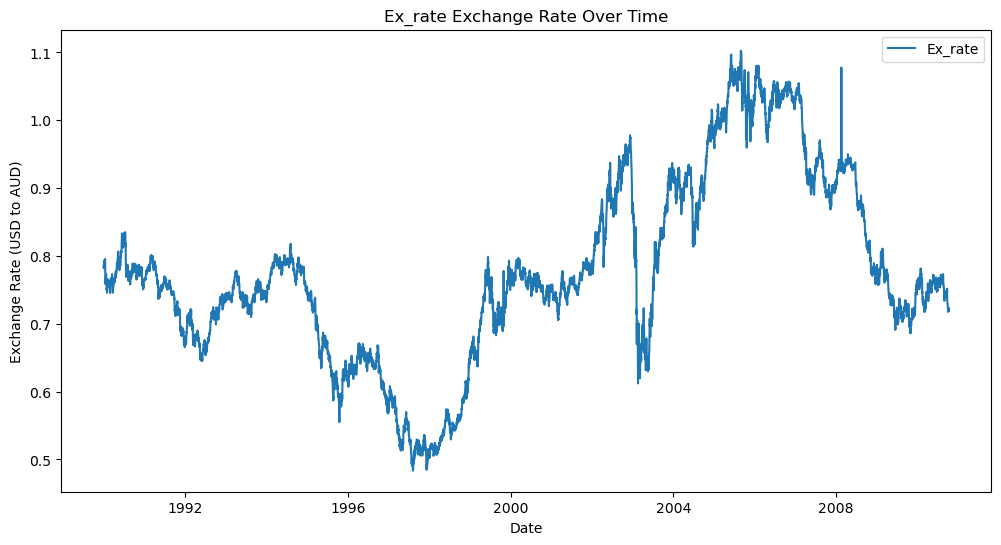

In [167]:
# Initial exploration
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[currency_column], label=currency_column)
plt.title(f"{currency_column} Exchange Rate Over Time")
plt.xlabel('Date')
plt.ylabel('Exchange Rate (USD to AUD)')
plt.legend()
plt.show()

In [169]:
#Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Ex_rate    0
dtype: int64


In [171]:
# Handle missing values
data = data.interpolate(method='time')  # Interpolate missing values

In [173]:
data[currency_column].fillna(method='ffill', inplace=True)

In [175]:
print("After handling missing values:\n", data.isnull().sum())

After handling missing values:
 Ex_rate    0
dtype: int64


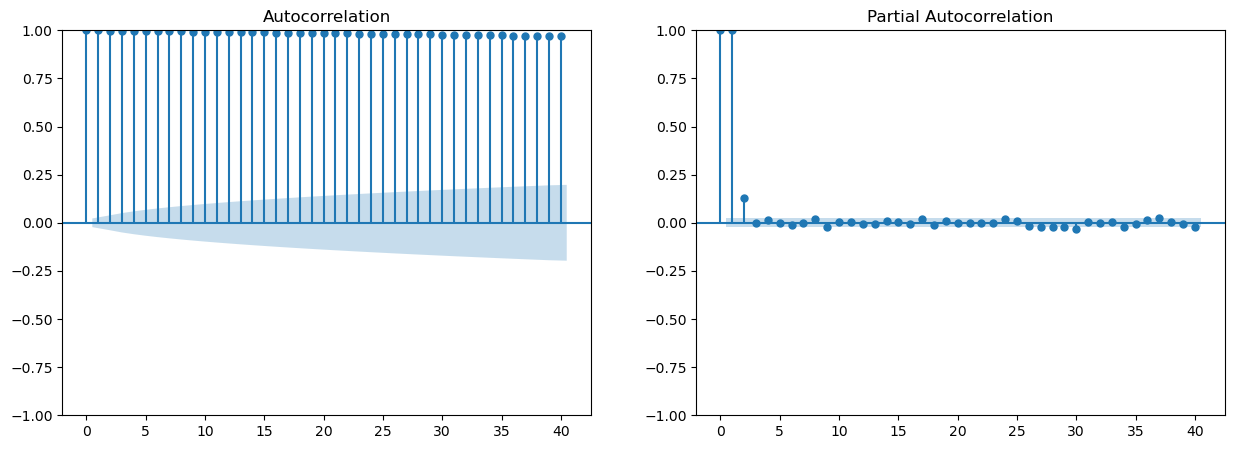

In [183]:
# Plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_pacf(series):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    plot_acf(series, lags=40, ax=axes[0])
    plot_pacf(series, lags=40, ax=axes[1])
    plt.show()

plot_acf_pacf(data[currency_column])


In [181]:
#Fit ARIMA Model
p, d, q = 1, 1, 1  
model_arima = ARIMA(data[currency_column], order=(p, d, q))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

C:\Users\Ashish\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ashish\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ashish\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sat, 04 Jan 2025   AIC                         -56102.322
Time:                        00:55:37   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

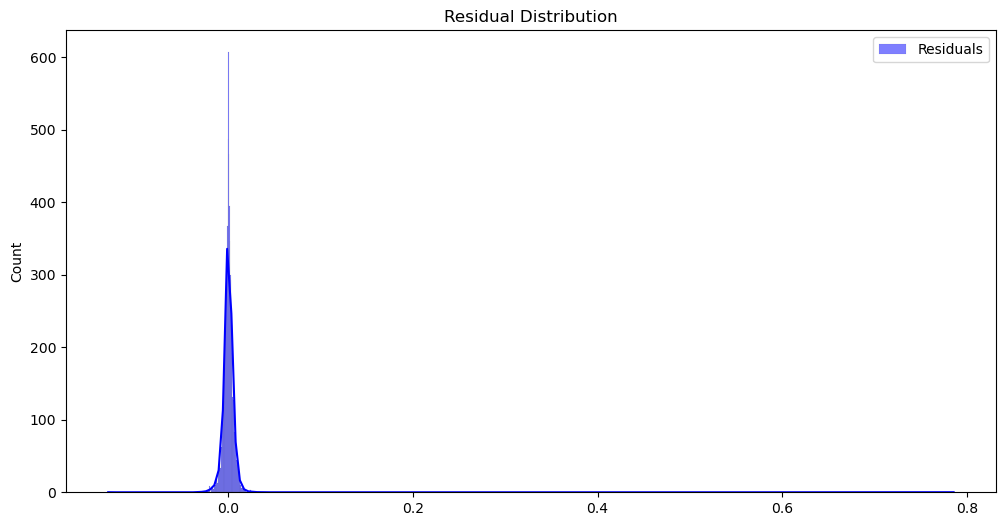

In [189]:
# Diagnose ARIMA residuals
residuals = arima_results.resid
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True, label='Residuals', color='blue')
plt.title('Residual Distribution')
plt.legend()
plt.show()


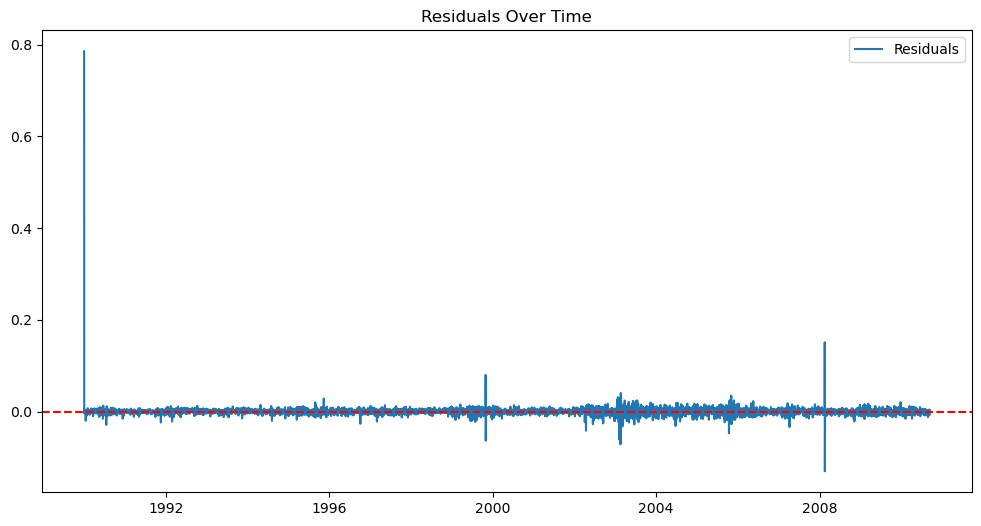

In [203]:
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals Over Time')
plt.legend()
plt.show()

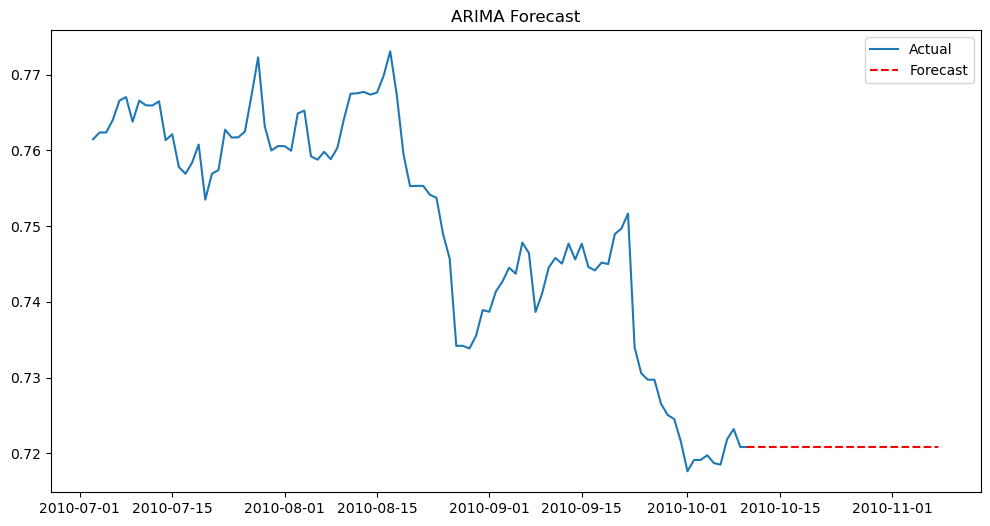

In [207]:
# Forecast with ARIMA
forecast_steps = 30
forecast_arima = model_arima_fit.forecast(steps=forecast_steps)
plt.figure(figsize=(12, 6))
plt.plot(data[currency_column][-100:], label='Actual')
plt.plot(pd.date_range(data.index[-1], periods=forecast_steps, freq='D'), forecast_arima, label='Forecast', color='red', linestyle='--')
plt.title("ARIMA Forecast")
plt.legend()
plt.show()

In [209]:
# Fit Exponential Smoothing model
model_es = ExponentialSmoothing(data[currency_column], seasonal='add', seasonal_periods=12).fit()
print(model_es.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77628.560
Trend:                             None   BIC                         -77531.479
Seasonal:                      Additive   AICC                        -77628.488
Seasonal Periods:                    12   Date:                 Sat, 04 Jan 2025
Box-Cox:                          False   Time:                         01:03:14
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8698377                alpha                 True
smoothing_seasonal       

C:\Users\Ashish\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


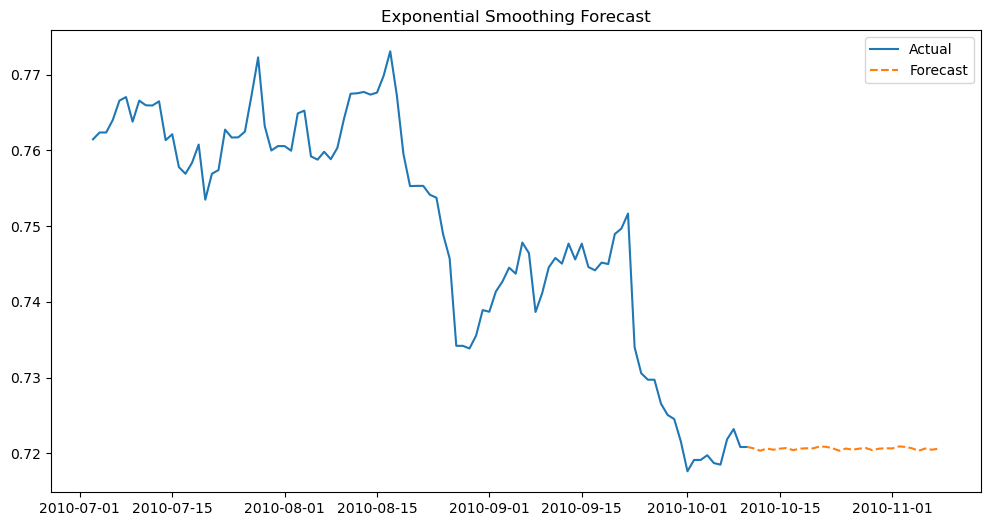

In [211]:
# Forecast with Exponential Smoothing
forecast_es = model_es.forecast(steps=forecast_steps)
plt.figure(figsize=(12, 6))
plt.plot(data[currency_column][-100:], label='Actual')
plt.plot(pd.date_range(data.index[-1], periods=forecast_steps, freq='D'), forecast_es, label='Forecast', linestyle='--')
plt.title("Exponential Smoothing Forecast")
plt.legend()
plt.show()

In [217]:
# Compute error metrics
def calculate_error_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    mape = np.mean(np.abs((true_values.to_numpy().flatten() - predicted_values) / true_values.to_numpy().flatten())) * 100
    return mae, rmse, mape

In [226]:
test_data = data[currency_column][-30:]
arima_forecast_values = forecast_arima[:30]
es_forecast_values = forecast_es[:30]

arima_metrics = calculate_error_metrics(test_data, arima_forecast_values)
es_metrics = calculate_error_metrics(test_data, es_forecast_values)


In [224]:
# Print error metrics
print("ARIMA Metrics - MAE: {:.5f}, RMSE: {:.5f}, MAPE: {:.5f}%".format(*arima_metrics))
print("Exponential Smoothing Metrics - MAE: {:.5f}, RMSE: {:.5f}, MAPE: {:.5f}%".format(*es_metrics))

ARIMA Metrics - MAE: 0.01272, RMSE: 0.01698, MAPE: 1.71192%
Exponential Smoothing Metrics - MAE: 0.01289, RMSE: 0.01713, MAPE: 1.73500%


In [238]:
#Conclusion

if arima_metrics[1] < es_metrics[1]:
    print("ARIMA performed better than Exponential Smoothing based on RMSE.")
else:
    print("Exponential Smoothing performed better than ARIMA based on RMSE.")

ARIMA performed better than Exponential Smoothing based on RMSE.
